In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
X, y = datasets.make_blobs(n_samples=1000, n_features=2, centers=5, cluster_std=[0.5, 0.5, 0.5, 1, 1])

In [4]:
X[:10]

array([[-4.45019723,  3.0977767 ],
       [ 3.42851984, -2.54414298],
       [ 3.6205059 , -2.19917112],
       [ 4.21492628, -2.4259985 ],
       [ 3.75705948, -1.88048068],
       [-3.9245717 ,  2.82377322],
       [ 8.43101627, -2.95422914],
       [-9.20953727, -3.25067243],
       [ 2.35385142, -6.7012647 ],
       [-5.1647913 ,  2.975527  ]])

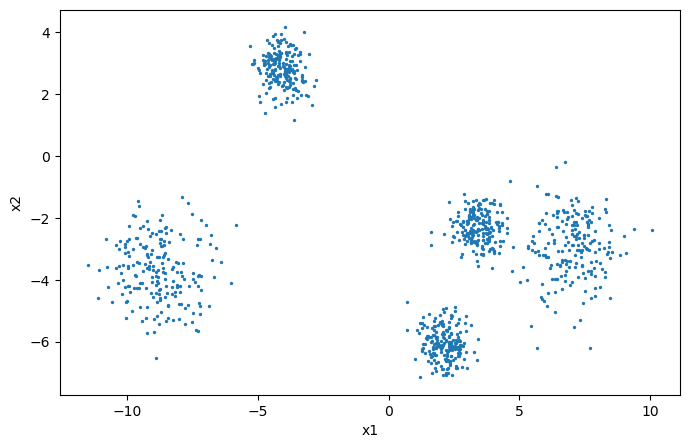

In [32]:
plt.figure(figsize=(8,5))
plt.scatter(X[:, 0], X[:, 1], s=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [6]:
from sklearn.cluster import KMeans

In [7]:
k=5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [9]:
y_pred[:10]

array([0, 1, 1, 1, 1, 0, 4, 3, 2, 0])

In [10]:
y_pred is kmeans.labels_

True

In [12]:
# 5 centroids (estimated cluster centers)
kmeans.cluster_centers_

array([[-4.08407903,  2.81806818],
       [ 3.43400568, -2.32185342],
       [ 2.12211194, -6.05907879],
       [-8.77627331, -3.70193436],
       [ 7.03729408, -2.93469492]])

In [14]:
kmeans.labels_[:10]

array([0, 1, 1, 1, 1, 0, 4, 3, 2, 0])

In [15]:
# prediction example: Which cluster each point belongs to
X_new = np.array([[0,2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 1, 0, 0])

## Voronoi Diagram: Clusters' highlight

Voronoi tessellation: Cluster’s decision boundaries where each centroid is represented with an X)

In [16]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

In [48]:
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    print(weights.max(), centroids)
    # centroid represented with a cross inside a circle
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=35, linewidths=8,
               color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=2, linewidths=12,
               color=cross_color, zorder=11, alpha=1)

In [49]:
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                        np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
        
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

204 [[-4.08407903  2.81806818]
 [ 3.43400568 -2.32185342]
 [ 2.12211194 -6.05907879]
 [-8.77627331 -3.70193436]
 [ 7.03729408 -2.93469492]]


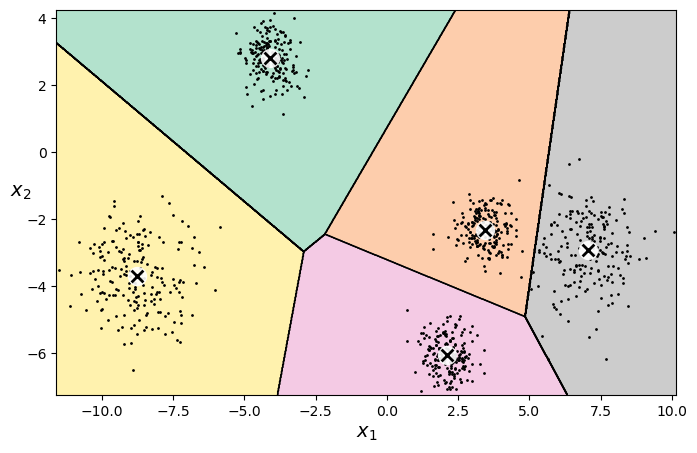

In [50]:
plt.figure(figsize=(8,5))
plot_decision_boundaries(kmeans, X)
plt.show()